# Steganography[2bit LSB]

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import math

In [2]:
coverImage = cv2.imread("ganesh.jpg",0)

In [3]:
coverImage = cv2.resize(coverImage,(512,512))

In [4]:
secretImage = cv2.imread("ny.jpeg",0)

In [5]:
secretImage = cv2.resize(secretImage,(64,64))

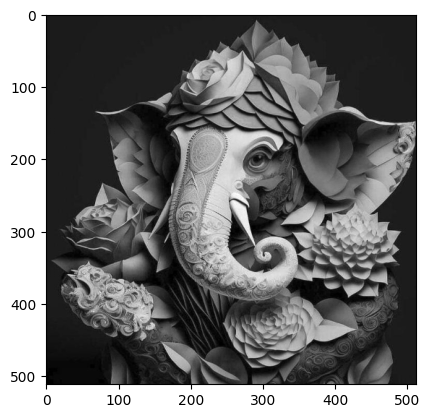

In [6]:
plt.imshow(coverImage,cmap='gray')
plt.show()

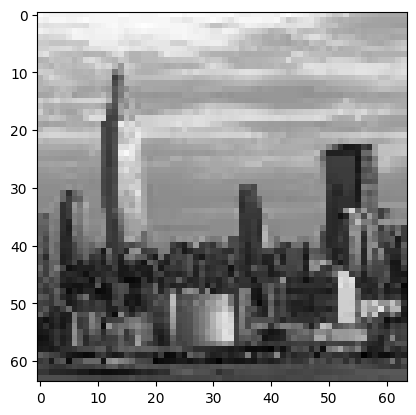

In [7]:
plt.imshow(secretImage,cmap='gray')
plt.show()

In [8]:
def int_to_bin(decimal):
    return ('{0:08b}'.format(decimal))

In [9]:
def bin_to_int(binary):
    return (int(binary, 2))

In [10]:
def image_to_bits(image):
    flat_data=image.flatten()
    msg=''
    for x in flat_data:
        msg=msg+int_to_bin(x)
    return msg

def bits_to_image(msg,r,c):
    l=len(msg)
    msg_image=[]
    pos=0
    while pos<l:
        msg_image.append(bin_to_int(msg[pos:pos+8]))
        pos=pos+8
    msg_image=np.reshape(msg_image,(r,c))
    return msg_image

In [11]:
def Embedding_two_lsb(coverImage,secretImage):
    r=coverImage.shape[0]
    c=coverImage.shape[1]
    stegoImage=coverImage.flatten()
    smsg=image_to_bits(secretImage)
    pos=0
    l=len(smsg)
    i=0
    while pos<l:
        pix=stegoImage[i]
        bpix=int_to_bin(pix)
        max=list(bpix)
        y=smsg[pos:pos+2]
        max[6:]=y
        new="".join(max)
        stegoImage[i]=bin_to_int(new)
        i=i+1
        pos=pos+2
    stegoImage=np.reshape(stegoImage,(r,c))
    return stegoImage 

In [12]:
def Extraction_two_lsb(stegoImage,r,c):
    stegoImage=stegoImage.flatten()
    nop=r*c*4
    msg=''
    i=0
    while i<nop:
        pix=stegoImage[i]
        bpix=int_to_bin(pix)
        bits=bpix[6:]
        msg=msg+bits
        i=i+1
    recImg=bits_to_image(msg,r,c)
    return recImg  

In [13]:
stegoImage=Embedding_two_lsb(coverImage,secretImage)

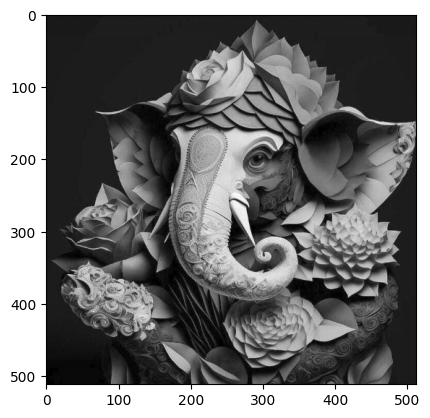

In [14]:
plt.imshow(stegoImage,cmap='gray')
plt.show()

In [15]:
secret=Extraction_two_lsb(stegoImage,64,64)

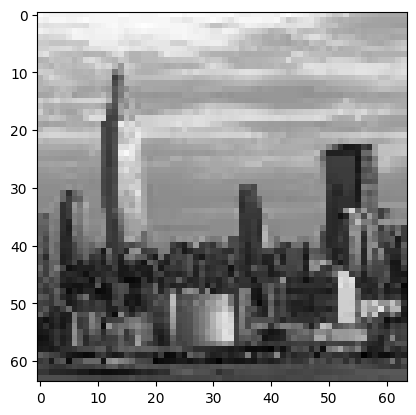

In [16]:
plt.imshow(secret,cmap='gray')
plt.show()

## MSE PSNR Calculation

In [17]:
def mse_psnr(a,b):    
    a=a.astype('float64')
    b=b.astype('float64')
    rows,cols=a.shape
    a=a.ravel()
    b=b.ravel()
    mse=0.0
    for i in range(rows*cols):
        mse=mse+math.pow(a[i]-b[i],2)
    mse=mse/(rows*cols)   
    try:
        psnr=20 * math.log10(255.0/ math.sqrt(mse))
        return mse,psnr
    except:
        return mse,-999

In [18]:
mse,psnr=mse_psnr(coverImage,stegoImage)

In [19]:
print(mse,psnr)

0.18344497680664062 55.49574536708489


In [20]:
mse,psnr=mse_psnr(secretImage,secret)
print(mse,psnr)

0.0 -999
